In [23]:
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [24]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.isnull().values.any()
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
5,1325318220,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
6,1325318280,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
7,1325318340,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
8,1325318400,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
9,1325318460,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [25]:
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('Date')
Daily_Price = group['Weighted_Price'].mean()
Daily_Price.head()

Date
2011-12-31    4.472579
2012-01-01    4.680778
2012-01-02    5.000000
2012-01-03    5.145917
2012-01-04    5.195443
Name: Weighted_Price, dtype: float64

In [26]:
new_df= pd.DataFrame(list(Daily_Price), index = Daily_Price.index, columns = ["Close"])

In [27]:
new_df.head()

,Close
Date,
2011-12-31,4.472579
2012-01-01,4.680778
2012-01-02,5.000000
2012-01-03,5.145917
2012-01-04,5.195443


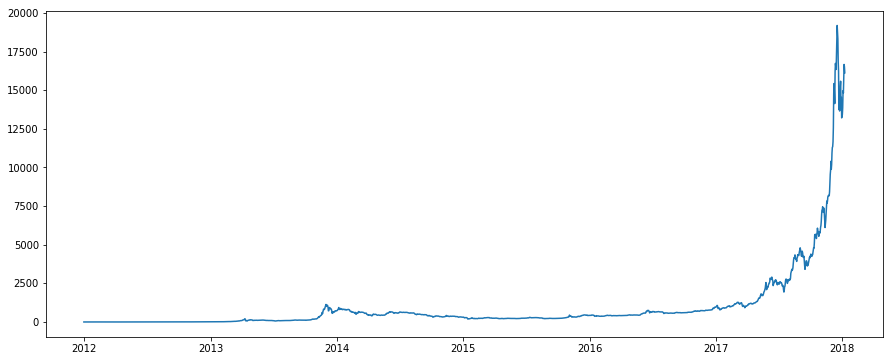

In [28]:
plt.plot(new_df)

In [29]:
# df = df[['Close']]
df=new_df
forecast_out = int(20)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2,random_state=0)

# clf = LinearRegression()
# clf.fit(X_train,y_train)
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
#            verbose=0, warm_start=False)

print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

# y_pred = forest_reg.predict(X_test)
# forest_mse = mean_squared_error(y_pred, y_test)
# forest_rmse = np.sqrt(forest_mse)
# print('Random Forest RMSE: %.4f' % forest_rmse)

cross_validation = forest_reg.predict(X_test)

confidence = forest_reg.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = forest_reg.predict(X_forecast)
print(forecast_prediction)

Random Forest R squared": 0.9762
confidence:  0.9761847887783476
[14673.72878697 13902.90079472 13415.64755722 13415.64755722
 13415.64755722 13415.64755722 14194.82099872 14194.82099872
 13415.64755722 13415.64755722 14314.22290282 14314.22290282
 13415.64755722 13415.64755722 13830.98718325 13830.98718325
 14194.82099872 14519.31685336 14519.31685336 13902.90079472]


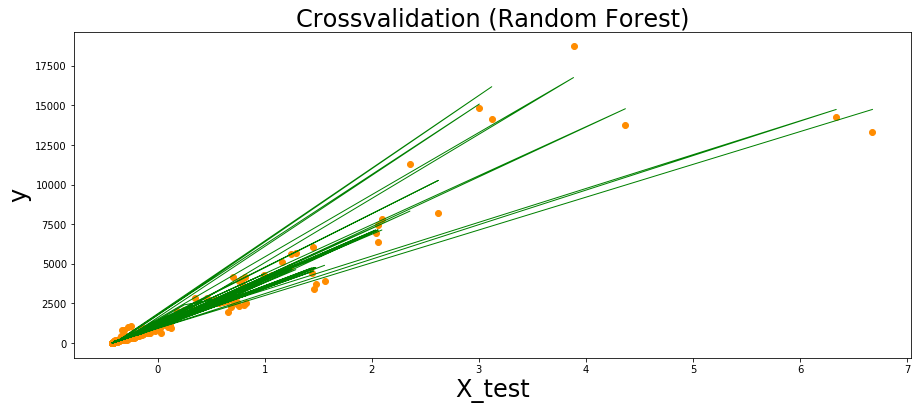

In [60]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='green', linewidth=1,label='predicted')
plt.title("Crossvalidation (Random Forest)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

364.3628100202365


In [32]:
last_date = new_df.iloc[-1].name
print(last_date)

2018-01-08


In [33]:
# import time
# last_unix = time.mktime(last_date.timetuple())
# # last_unix = last_date.timestamp()
# # last_unix = last_date
# print(last_unix)
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
# np.random.seed(seed=1111)
# data = np.random.randint(1, high=100, size=len(days))
df1 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df1 =df1.set_index('Date')
df1.info()
print(df.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-01-08 to 2018-01-27
Data columns (total 1 columns):
Close    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes
               Close  Prediction
Date                            
2011-12-31  4.472579    6.655063
2012-01-01  4.680778    6.887750
2012-01-02  5.000000    6.614472
2012-01-03  5.145917    6.543410
2012-01-04  5.195443    6.506604


Text(0,0.5,'$(Dollar)')

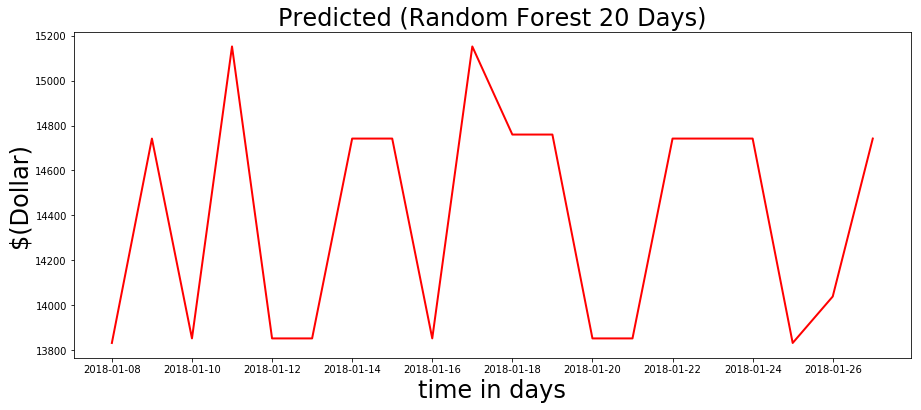

In [62]:
# # df['Close'].plot()
# df1['Close'].plot()
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()
# print('jkhkjhkj')
# print(df1['Close'].head())
plt.plot(df1,color='red', lw=2)
plt.title("Predicted (Random Forest 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)

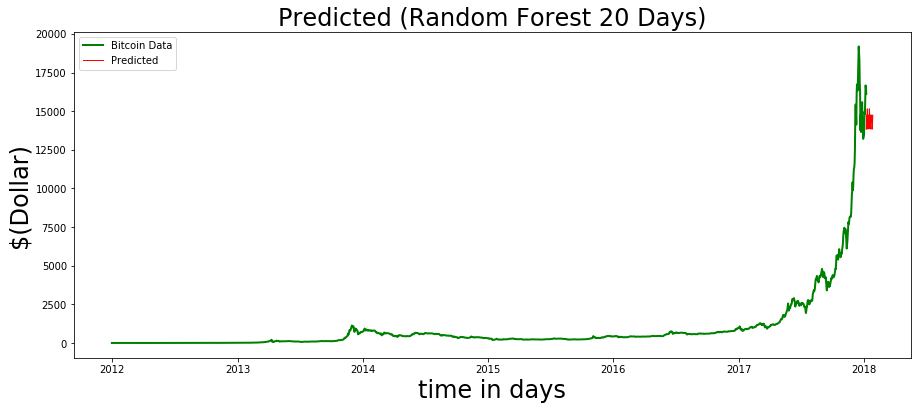

In [74]:
# plt.figure(figsize=(12,8))
# plt.plot(df['Close'], label='Train')
# plt.plot(df1['Close'], label='Predicted')
# # plt.plot(X_test['Close'], label='Test')
# # plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
# plt.legend(loc='best')
# plt.show()
plt.plot(df['Close'],label='Bitcoin Data',color='green', lw=2)
plt.plot(df1['Close'],label='Predicted',color='red', lw=1)
plt.title("Predicted (Random Forest 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
plt.legend(loc='best')

In [41]:
from sklearn import preprocessing, cross_validation, svm
df2=new_df
forecast_out1 = int(20)

df2['Prediction'] = df2[['Close']].shift(-forecast_out1)

X = np.array(df2.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df2['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2,random_state=0)

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)


cross_validation = model.predict(X_test)

confidence = model.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = model.predict(X_forecast)
print(forecast_prediction)

confidence:  0.9761153148117455
[13832.80189707 14742.01435275 13853.0941637  15151.64738759
 13853.0941637  13853.0941637  14742.01435275 14742.01435275
 13853.0941637  15151.64738759 14759.83727646 14759.83727646
 13853.0941637  13853.0941637  14742.01435275 14742.01435275
 14742.01435275 13832.80189707 14039.48859726 14742.01435275]


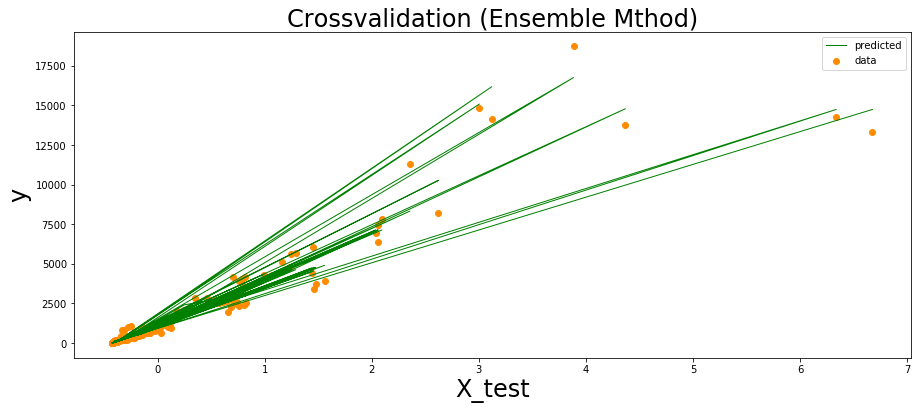

In [75]:
import matplotlib.pyplot as plt
# # print(X_test)
# # print(y_test)
# # plt.plot(X_test,forecast_set,color='blue', linewidth=1)
# plt.scatter(X_test, y_test, color='darkorange', label='data')
# plt.plot(X_test, cross_validation, color='blue', linewidth=1)
# # plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
# plt.show()
plt.scatter(X_test, y_test, color='darkorange', label='data')
plt.plot(X_test, cross_validation, color='green', linewidth=1,label='predicted')
plt.title("Crossvalidation (Ensemble Mthod)",fontsize=24)
plt.xlabel('X_test',fontsize=24)
plt.ylabel('y',fontsize=24)
plt.legend(loc='best')
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, cross_validation))
print(rms)

324.198488451777


In [54]:
last_date = new_df.iloc[-1].name
print(last_date)

2018-01-08


In [56]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
date_today = last_date
days = pd.date_range(date_today, date_today + timedelta(19), freq='D')
print(len(days),len(forecast_prediction))
df3 = pd.DataFrame({'Date': days, 'Close': forecast_prediction})
df3 =df3.set_index('Date')
df3.info()
print(df3.head())

20 20
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-01-08 to 2018-01-27
Data columns (total 1 columns):
Close    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes
                   Close
Date                    
2018-01-08  13832.801897
2018-01-09  14742.014353
2018-01-10  13853.094164
2018-01-11  15151.647388
2018-01-12  13853.094164


No handles with labels found to put in legend.


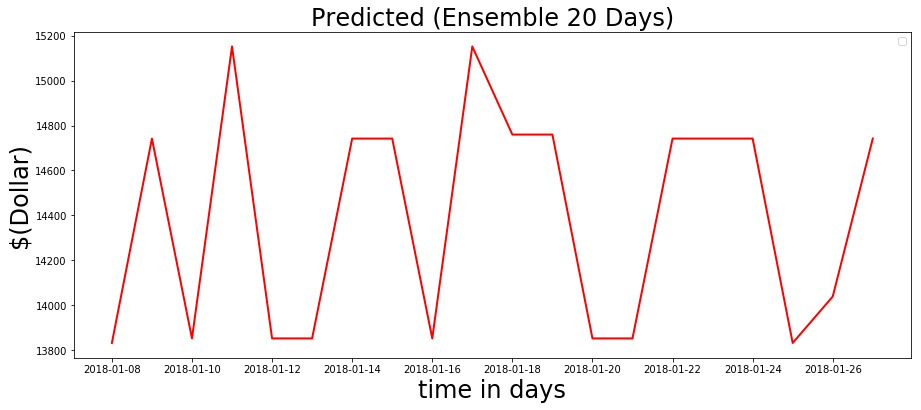

In [76]:
# # df['Close'].plot()
# df3['Close'].plot()
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()
# print('jkhkjhkj')
# print(df1['Close'].head())
plt.plot(df3,color='red', lw=2)
plt.title("Predicted (Ensemble 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
# plt.legend(loc='best')

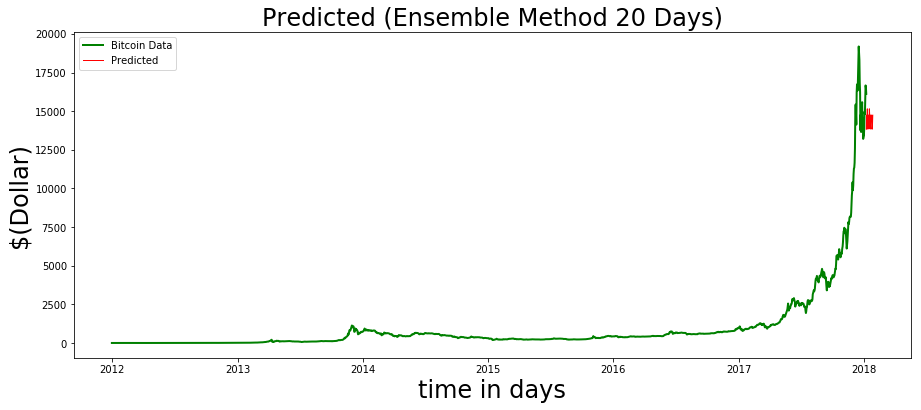

In [78]:
# plt.figure(figsize=(12,8))
# plt.plot(df['Close'], label='Train')
# plt.plot(df3['Close'], label='Predicted')
# # plt.plot(X_test['Close'], label='Test')
# # plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
# plt.legend(loc='best')
# plt.show()
plt.plot(df['Close'],label='Bitcoin Data',color='green', lw=2)
plt.plot(df3['Close'],label='Predicted',color='red', lw=1)
plt.title("Predicted (Ensemble Method 20 Days)",fontsize=24)
plt.xlabel('time in days',fontsize=24)
plt.ylabel('$(Dollar)',fontsize=24)
plt.legend(loc='best')